# Lab 10 Sentiment Analysis

## Due: Midnight, May 2nd
In this lab, we will learn
- how to preprocess text data
- how to perform sentiment analysis


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save and Checkpoint”.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save and Checkpoint often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download as”, Choose Notebook (.ipynb)
- After download is complete, Click on File, Select “Download as” again, Choose PDF via Latex (.pdf)
- Submit both the Notebook file and the PDF File as your submission for Lab 10.

# 1. Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import re  

## 1.1 Load Data
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015. Each twitter is labeled as positive, negative, and neutral. The column **airline_sentiment** gives the groundtruth sentiment of the column **text**. Our goal is to train a classifier on text that can predict the sentiment of new tweets.

In [2]:
tweets = pd.read_csv("Tweets-US-Airline-Sentiment.csv")

In [3]:
# the first 5 rows of the dataset
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets.shape

(14640, 15)

## 1.2 Exploratory Data Analysis

In [5]:
%matplotlib inline
import seaborn as sns

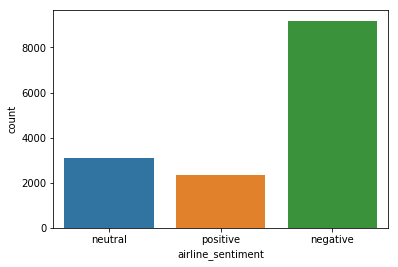

In [6]:
# the number of positive, negative and neutral reviews
sns.countplot(x='airline_sentiment', data=tweets)

## Exercise 1
Following the above example, please plot the number of tweets for each airline, i.e., x axis is airline, y axis is the count of tweets

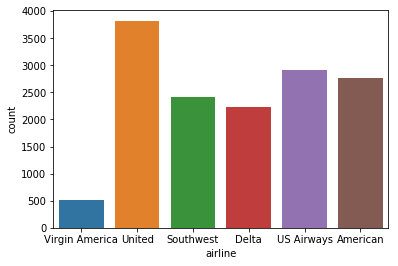

In [7]:
# TODO: the number of reviews of each airlines?????????????????????????????????????????
sns.countplot(x='airline', data=tweets)

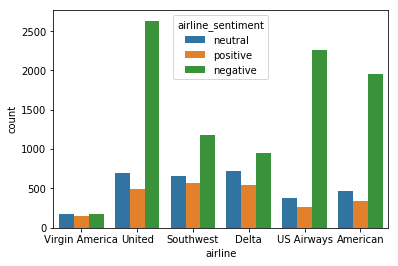

In [8]:
# the number of reviews of each type that each Airline received
sns.countplot(x='airline', hue="airline_sentiment", data=tweets)

## 1.3 Data Preprocessing

In [9]:
# create our feature set X and the label set y
X = tweets.iloc[:, 10].values  # the 10th column is the text
y = tweets.iloc[:, 1].values   # the 1st column is the groundtruth sentiment

print(X[0:5])

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'
 "@VirginAmerica and it's a really big bad thing about it"]


In [10]:
print(y[0:5])
print(len(X))
print(len(y))

['neutral' 'positive' 'neutral' 'negative' 'negative']
14640
14640


In [11]:
processed_tweets = []

# remove special characters and empty spaces in order to have a clean dataset
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [12]:
print(processed_tweets[0:5])

[' virginamerica what dhepburn said ', ' virginamerica plus you ve added commercials to the experience tacky ', ' virginamerica didn today must mean need to take another trip ', ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse', ' virginamerica and it a really big bad thing about it']


## 1.4 Convert to TF-IDF
currently, the processed_tweets stll in sentence format. We need to convert it to TF-IDF before we can apply classifiers such as SVM and Random Forest. We will use sklearn.feature_extraction.text.TfidfVectorizer to convert the texts to TF-IDF format. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html for more details.

In [13]:
# prepare stopwords
with open('stopwords-english') as f:
    stopwords = f.read().splitlines()

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
## TF-IDF Scheme for Text to Numeric Feature Generation, please refer to 
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords)  
X = tfidfconverter.fit_transform(processed_tweets).toarray()

In [15]:
print(X[0:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.5 Dividing Data to Training and Test Sets
We will train classifiers on the taining set and test on the test set.

In [16]:
## Dividing Data to Training and Test Sets, with 20% as the test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2 Sentiment Analysis
Now we are going to train various classifiers on the training set and test on the test set.

## 2.1 Random Forest
Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for details of random forest classifier.

In [17]:
# the classifier of randomforest
from sklearn.ensemble import RandomForestClassifier
classifier_RandomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=0)  
classifier_RandomForestClassifier.fit(X_train, y_train)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
# make predictions on the test set
predictions_RandomForestClassifier = classifier_RandomForestClassifier.predict(X_test)

In [19]:
# use accuracy as the performance metric to evaluate the classification model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions_RandomForestClassifier))

0.7513661202185792


## 2.2. Multi-layer Perceptron classifier
Multi-layer Perceptron classifier is the simplist version of neuron networks. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html for details of multilayer perceptron classifier.

In [20]:
# the classifier of # Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
classifier_MLPClassifier = MLPClassifier(alpha=1, max_iter=10)
classifier_MLPClassifier.fit(X_train, y_train)
predictions_MLPClassifier = classifier_MLPClassifier.predict(X_test)
print(accuracy_score(y_test, predictions_MLPClassifier))

0.7619535519125683


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 2.3 Support Vector Machine
For details of support vector machine, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Exercise 2
Please train a support vector machine on the taining set and test on the test set. Set kernel as 'linear', C as 0.025 and max_iter as 200

In [21]:
# the classifier of SVM
from sklearn.svm import SVC
classifier_SVC = SVC(kernel="linear", C=0.025, max_iter=200)
classifier_SVC.fit(X_train, y_train)
predictions_SVC = classifier_SVC.predict(X_test)
print(accuracy_score(y_test, predictions_SVC))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.5710382513661202


## 2.4 Multinomial Naive Bayes
For details of Multinomial Naive Bayes, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

## Exervise 3
Please use Multinomial Naive Bayes to perform classification.

In [22]:
# Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train, y_train)
predictions_MNB = classifier_MNB.predict(X_test)
print(accuracy_score(y_test, predictions_MNB))

0.7558060109289617
